# Introduction to Data Science Assignment



***

### Preparing a Training Set and Training a Decision Tree
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the target variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [2]:
import pandas as pd

main_df = pd.DataFrame(pd.read_csv('/Users/derin/Desktop/1001Data/cell2cell_data.csv'))
main_df.columns = ['revenue', 'outcalls', 'incalls', 'months',
                   'eqpdays', 'webcap', 'maryyes', 'travel', 'pcown',
                  'creditcd', 'retcalls', 'churndep']
train_df = main_df.sample(axis=0, frac=0.8, replace=False)
test_df = main_df.drop(train_df.index)

train_df
# test_df.shape

,revenue,outcalls,incalls,months,eqpdays,webcap,maryyes,travel,pcown,creditcd,retcalls,churndep
16596,136.47,85.33,23.00,9,21,1,0,0,0,0,0,1
37968,96.96,37.67,75.00,18,136,1,0,0,0,0,0,0
36313,14.21,36.00,16.67,18,254,1,1,0,0,1,0,0
8434,50.24,36.00,1.00,10,316,1,0,0,0,0,0,1
9954,35.19,23.00,5.67,16,472,1,0,0,0,1,0,1
5058,37.48,4.67,5.00,24,720,1,1,0,1,1,0,1
1570,79.22,20.67,22.33,30,909,0,0,0,0,1,0,1
30177,59.31,0.00,0.00,10,296,1,1,1,1,1,0,0
9666,34.99,15.67,2.67,11,316,1,0,0,0,0,0,1
34529,65.53,12.67,6.00,7,45,1,0,0,0,0,0,0


2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

__Answer__: 

In our datasets, train_df and test_df, each instance is characterized by a set of features: ['revenue', 'outcalls', 'incalls','months','eqpdays', 'webcap', 'maryyes', 'travel', 'pcown','creditcd', 'retcalls', 'churndep'].

If being in one of the samples is independent of the features listed above, we can say that the
sample is unbiased. Therefore, we need to come up with a way/ways to show that there aren't any significant differences between the column descriptions of the same feature in different datasets. For example showing that the mean values for 'revenue' aren't significantly different than each other and the frequency values of training set's 'marryyes' and test set's 'creditcd' aren't significantly different than each other is necessary. 

For 'revenue', 'outcalls', 'incalls', 'months', 'eqpdays', it makes sense to compare the mean values. That is, we need to see if that feature's mean values are similar to each other in different datasets. For this purpose, I would use two-tailed independent samples t test.

__Two-Sample t-test Hypotheses__

$H_{0}: \mu_{Training} = \mu_{Test}$, In words, there is not a significant difference between the mean values of the two samples with respect to [feature].

$H_{1}: \mu_{Training} \neq \mu_{Test}$, In words, there is a significant difference between the mean values of the two samples with respect to [feature].

In the case of __'revenue'__, the code will look like this: 

    rev_train = np.array(train_df['revenue'])

    rev_test = np.array(test_df['revenue'])

    scipy.stats.ttest_ind(rev_train, rev_test)

And the output will look like this: 

    Ttest_indResult(statistic=-0.90312554984292426, pvalue=0.36646472342202585). 

This pvalue, well above 0.05 default, tells us that the difference is not significant between two data sets. Another way to verify this is by looking at the absolute value of the test statictic, here 0.9 < 1.96, that is lower than the treshold. This again tells us that the difference is not significant between the two data sets. 

For the dummy variables 'webcap', 'maryyes', 'travel', 'pcown','creditcd', and 'churndep', it makes more sense to compare the frequency distributions. That is, testing if the 1s and 0s are distributed similarly in each sample's feature array. 

Because our two datasets are unpaired and the variables are binomial, I would use Fisher's Exact Test to determine whether there are significant differences in terms of frequency between samples. 

Here I excluded 'retcalls' from the test because it is the number of calls made to retention team, which is almost always zero for all customers in both samples. Fisher's Exact Test works for 2x2 tables, so it might not always yield the expected result as its frequency array is often 1-dimensiomnal. 

__Fisher's Exact Test Hypotheses__

$H_{0}$: There is not an association between the frequency values of [feature] across samples. 

$H_{1}$: There is an association between the frequency values of [feature] across samples. 

In the case of __'creditcd'__, the code will look like: 

    crcd_tr_fr = np.unique(np.array(train_df['creditcd']), return_counts=True)

    crcd_ts_fr = np.unique(np.array(test_df['creditcd']), return_counts=True)

    scipy.stats.fisher_exact(np.array([crcd_tr_fr[1], crcd_ts_fr[1]]))

And the output will look like this: 

    (0.98702506577266447, 0.63010982513493607) 
    
which tells us that the observed distribution or imbalance in frequency distributions across samples is not significant since 0.63 > 0.05. 

In [3]:
## To see if all of them work, this part can be skipped. 

import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import itemfreq

## Revenue
rev_train = np.array(train_df['revenue'])
rev_test = np.array(test_df['revenue'])
##  Eqpdays
eqp_train = np.array(train_df['eqpdays'])
eqp_test = np.array(test_df['eqpdays'])
## Incalls
inc_train = np.array(train_df['incalls'])
inc_test = np.array(test_df['incalls'])
## Outcalls
out_train = np.array(train_df['outcalls'])
out_test = np.array(test_df['outcalls'])
## Months
mon_train = np.array(train_df['months'])
mon_test = np.array(test_df['months'])

print (scipy.stats.ttest_ind(rev_train, rev_test))

## BINARY VARIABLE FREQUENCIES / Frequencies for Fisher's Exact
## tr_fr: train_df frequency
## ts_fr: test_df frequency

web_tr_fr = np.unique(np.array(train_df['webcap']), return_counts=True) 
web_ts_fr = np.unique(np.array(test_df['webcap']), return_counts=True)

marryyes_tr_fr = np.unique(np.array(train_df['maryyes']), return_counts=True)
marryyes_ts_fr = np.unique(np.array(test_df['maryyes']), return_counts=True)

travel_tr_fr = np.unique(np.array(train_df['travel']), return_counts=True)
travel_ts_fr = np.unique(np.array(test_df['travel']), return_counts=True)

pcown_tr_fr = np.unique(np.array(train_df['pcown']), return_counts=True)
pcown_ts_fr = np.unique(np.array(test_df['pcown']), return_counts=True)

crcd_tr_fr = np.unique(np.array(train_df['creditcd']), return_counts=True)
crcd_ts_fr = np.unique(np.array(test_df['creditcd']), return_counts=True)

ret_tr_fr = np.unique(np.array(train_df['retcalls']), return_counts=True)
ret_ts_fr = np.unique(np.array(test_df['retcalls']), return_counts=True)

churn_tr_fr = np.unique(np.array(train_df['churndep']), return_counts=True)
churn_ts_fr = np.unique(np.array(test_df['churndep']), return_counts=True)


scipy.stats.fisher_exact(np.array([crcd_tr_fr[1], crcd_ts_fr[1]]))

# scipy.stats.fisher_exact(np.array([churn_tr_fr[1], churn_ts_fr[1]]))
# scipy.stats.fisher_exact(np.array([web_tr_fr[1], web_ts_fr[1]]))

Ttest_indResult(statistic=0.84942359428310732, pvalue=0.3956507309454842)


(0.98280852276216923, 0.52081023783949232)

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [4]:
import sklearn
from sklearn import tree
from scipy.stats import entropy

Y = train_df['churndep']            ## setting the target variable to 'churndep' of training data
X = train_df.drop('churndep', 1)    ## setting the remaining variables of the training data as predictors

churn_tree = sklearn.tree.DecisionTreeClassifier(criterion='entropy')
churn_tree.fit(X, Y)

feature_mi = churn_tree.feature_importances_
M = pd.Series(feature_mi, index = X.columns)
M_dict = dict(M)
M
# M_dict

revenue     0.267046
outcalls    0.191215
incalls     0.124128
months      0.082994
eqpdays     0.250049
webcap      0.003944
maryyes     0.023604
travel      0.011783
pcown       0.019845
creditcd    0.020472
retcalls    0.004918
dtype: float64

4\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

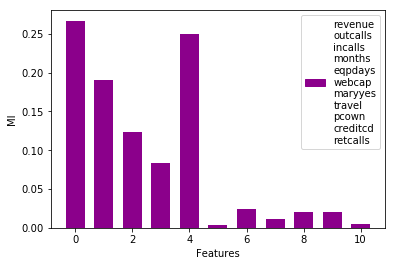

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

N = list(M_dict)
Q = '\n'.join(N)

y = range(len(feature_mi))
plt.bar(y, M_dict.values(), width=1/1.5, color = 'darkmagenta')
plt.xlabel('Features') 
plt.ylabel('MI')
legend_label = mpatches.Patch(color='darkmagenta', label=Q)  ## Q = '\n'.join(N)
plt.legend(handles=[legend_label])

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

In [6]:
feature_mi3_df = pd.DataFrame([train_df['revenue'], train_df['months'], train_df['outcalls'], 
                             train_df['eqpdays'], train_df['churndep']])
feature_mi3_df = feature_mi3_df.T
feature_mi3_df.corr(method='pearson')

,revenue,months,outcalls,eqpdays,churndep
revenue,1.000000,-0.015664,0.503045,-0.219314,-0.016766
months,-0.015664,1.000000,-0.041273,0.486769,0.024605
outcalls,0.503045,-0.041273,1.000000,-0.240228,-0.037780
eqpdays,-0.219314,0.486769,-0.240228,1.000000,0.116396
churndep,-0.016766,0.024605,-0.037780,0.116396,1.000000


__Answer__  

The three most important features are revenue, eqpdays, and outcalls. 

According to the pearson correlation table above:

1 - The linear relationship between mean monthly revenue and churn is negative, even though the correlation coefficient is relatively small. 

    The main reason that the customers who pay more are less likely to churn is that they tend to pay more in the first months of their service. 
    At first glance, the negative relationship between revenue and churndep seems like a consequence of negative relationship between loyalty (or frequency of use) and churn behavior. To see if this was the case, 'months' was also included in the correlation table. 
    However, from the second column of the table, it can be seen that there is a negative relationship between revenue and months, and there is a positive relationship between churn and months. 
    Of course causality cannot be inferred from a simple analysis like this one, but this reveals the relationship between months and churn. The reason that revenue and churndep have a negative relationship is; the monthly revenue actually decreases with time. On the other hand, people are much less likely to churn in the short term than they are in the long term.(This is explained in the 'eqpdays' part of this answer.)
    

2 - The linear relationship between mean number of outbound voice calls and churn is also negative.  

    The more frequently a customer uses our call service, the less likely he/she is to leave the operator. To prevent the less frequent users from leaving the operator, we can start a campaign 
    
3 - The linear relationship between the number of days the customer has had his/her current equipment is positive. 
    
    The customers who purchase devices with service agreements with our operator have an incentive to remain as our customer until the end of the contract. 
    In order to prevent churn, we can target the customers whose contract terms are ending soon. 



6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each? If they are different, can you explain the difference?

In [8]:
from sklearn.metrics import accuracy_score

## TRAIN DF 

Y = train_df['churndep']
X = train_df.drop('churndep', 1)

churn_train_prd = churn_tree.predict(X)
# churn_train_prd
print ('The accuracy score of the tree on the training data is ' + str(accuracy_score(Y, churn_train_prd)))

## TEST DF 

Z = test_df.drop('churndep', 1)
T = test_df['churndep']

churn_prd = churn_tree.predict(Z)
from sklearn.metrics import accuracy_score
print ('The accuracy score of the tree on the test data is ' + '%2f' % (accuracy_score(T, churn_prd)))

The accuracy score of the tree on the training data is 0.999843191369
The accuracy score of the tree on the test data is 0.528726


__Explanation__

The accuracy scores of the model on training and test datasets are different. 

The accuracy score on the training data is over 99%. However, the accuracy score on the test data is 52.8%. We see this difference between two datasets because without any limits, our model simply memorizes the training data, and when it encounters new instances it performs poorly. 

### Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [17]:
min_samples_split_values = np.array(range(300, 3000, 270))
min_samples_leaf_values = np.array(range(300, 4000, 370))

2\. Explain in words your reasoning for choosing the above ranges.

Normally, I would grow n trees by n-fold cross validation and test the resulting models against more than one range combination of split-leaf values to find the optimal configuration. Since this was not requested here, I just recalled reading on some articles that people used 1% of the number of total observations as the min_samples_leaf limit and tried that. Since we have sufficient data points, the possible leaf sizes do not seem to be small enough to make the tree overfit. 

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

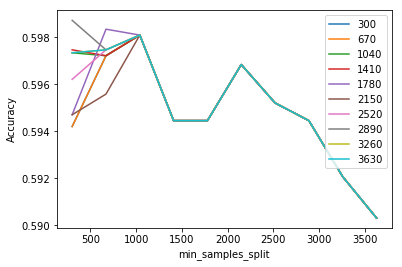

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

## min_leaf values to combine with vstack into an ndarray
leaf_to_co = (np.array([min_samples_leaf_values]*10)).reshape(100, 1)
## min_split values to combine with vstack into an ndarray
split_to_co = (np.array([min_samples_split_values]*10).T).reshape(100,1)

## min_leaf and min_split values vstacked to generate combinations of values
combine_dt = np.vstack((split_to_co, leaf_to_co))
combine_dt = (combine_dt.reshape(2,100)).T

## setting the explanatory and target variables from the test data
Z = test_df.drop('churndep', 1)
T = test_df['churndep']

## below these k, l values will be determined by retrieving rows from the vstacked array of 
## min_leaf and min_split values.
def build_tree(k, l):
    Comb_Tree = sklearn.tree.DecisionTreeClassifier(criterion='entropy',
                                                    min_samples_split=k,
                                                    min_samples_leaf=l)
    return Comb_Tree

## finding the accuracy of the tree that we fit according to the training data on the test data
def find_accuracy(Comb_Tree):
    Comb_Tree.fit(X, Y)
    return accuracy_score(T, Comb_Tree.predict(Z))

## creating two empty lists to later fill with the accuracy scores and their corresponding
## min_split, min_leaf combinations at the same index
accuracy_ls = []
combination_ls = []

for k, l in combine_dt: 
    accuracy_ls.append(find_accuracy(build_tree(k,l)))
    combination_ls.append([k,l])

## Now the lists are filled with combination - accuracy pairs. Preparing them for to
## construct a DataFrame.
combination_sr = pd.Series(combination_ls)
accuracy_sr = pd.Series(accuracy_ls)

## From now on, we can use co_ac_df (combination-accuracy df, not so creative, just to remind
## the reader of its aim) to find min-max accuracy values and optimal configuration.
co_ac_df = (pd.DataFrame(data=[combination_sr, accuracy_sr])).T

splits_x  = pd.Series(co_ac_df.iloc[:][0])
acc_y = pd.Series(co_ac_df[1][:])

x_axis_1 = []
for split in splits_x:
    x_axis_1.append(split[1])

y_axis_1 = []
for accuracy in acc_y:
    y_axis_1.append(accuracy)

plt.plot(x_axis_1[:10], y_axis_1[:10])
plt.plot(x_axis_1[10:20], y_axis_1[10:20])
plt.plot(x_axis_1[20:30], y_axis_1[20:30])
plt.plot(x_axis_1[30:40], y_axis_1[30:40])
plt.plot(x_axis_1[40:50], y_axis_1[40:50])
plt.plot(x_axis_1[50:60], y_axis_1[50:60])
plt.plot(x_axis_1[60:70], y_axis_1[60:70])
plt.plot(x_axis_1[70:80], y_axis_1[70:80])
plt.plot(x_axis_1[80:90], y_axis_1[80:90])
plt.plot(x_axis_1[90:100], y_axis_1[90:100])

plt.legend(x_axis_1, loc=1)
ax = plt.subplot(111)
ax.set_ylabel('Accuracy')
ax.set_xlabel('min_samples_split')

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

In [19]:
## This is just how the configuration that yields the highest accuracy score is found.
## Please see the below cell for explanation.

def find_max_conf(DataFrame):
    '''Finds the maximum value on the 2nd col of the input DataFrame. 
    Returns the value of the 1st col at the corresponding row index.'''
    max_conf = DataFrame[1].max()
    max_co_list = []
    for i in range(len(DataFrame[1])):
        if DataFrame[1][i] != max_conf:
            pass
        elif DataFrame[1][i] == max_conf:
            max_co_list.append(DataFrame[0][i])
            return DataFrame[0][i]
    while i not in range(len(DataFrame[1])):
        break 

print ('The maximum accuracy is: ' + str('%2f' % co_ac_df[1].max()))
print ('The configuration that yields the best accuracy is: ' + str(find_max_conf(co_ac_df)))

The maximum accuracy is: 0.598721
The configuration that yields the best accuracy is: [2190, 300]


__Explanation__

    The configuration that yields the best accuracy is: [2190, 300]
    
The model returns the maximum accuracy when min_samples_split and min_samples_leaf are set to 2190 and 300 respectively. There must be at least 2190 samples on an internal node (a node that can be splitted further), and there must be at least 300 samples on a leaf node. That is, the model can split an internal node to maximum ~7 meaningful leaves/branches. 
    
    The maximum accuracy is: 0.598721
    
This accuracy score reflects the ( Number of Correct Classifications / Total  Number of Classifications ) ratio. In other words, out of every 100 classifications of our model, maximum 59 classifications will be correct ones. This plain accuracy does not account for the difference between false positives and  false negatives. We can say that approximately 60% is better than just guessing, which can be considered as 50% accuracy. 


5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

__Answer__

If I were working for the marketing department and assuming that I'm not getting access to more meaningful features/models in the future, to target the customers who are more likely to churn I would suggest: 
 
__1)__ Arranging a campaign for the customers whose contract terms are ending soon. For example, the telecom company can offer special packages with discounts on the features that the churning users most frequently use. I also assume that this is the data collected from a developed country, so telecom can be considered as a saturated market with a few companies. Therefore these shouldn't be massive discounts that would encourage the company's few big competitors to cut prices just to capture market share.  
    
__2)__ Besides price discounts, I would also suggest designing a promotional plan for churning customers when we have access to the demographic data for these records, i.e. when we know where to find these customers who are likely to churn. This promotional plan should aim to 1) prevent the customers whose contract terms are ending from churning, 2) if possible, persuade the customers of other companies to switch to our service, because if our customers are churning, in a competitive market like this, the other companies should be losing some customers, too. This includes partnering up with Apple/Samsung/whoever is the most popular smartphone seller in that market and offering advantageous one/two-year smartphone purchase agreements (I don't know if there is a legal max contract term in the US). 
    
__3)__ I would identify the customers whose accounts have a decreasing volume of outbound calls, but I have to say that I don't believe that number of calls itself is an appropriate metric for measuring usage among telecom customers anymore. If I had access to weekly data usage, or even better weekly data usage for social media/messaging packages WITH the number of outbound calls, I believe that would be much more helpful than trying to classify churning customers just according to calls. 
    
__4)__ If I were provided with the data(internet) usage information, we could go back to step 1, and see if we can remix the packages of churning customers according to their needs instead of just offering discounts. Because if we are trying to sell 'minutes/calls' to a customer who in fact does not use them, they wouldn't buy the package until we offer it for free. 
   